In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
import pickle

In [4]:
raw_data = pd.read_csv('datasets/samsung200129_220328.csv')
print(raw_data.head())
raw_data.info()

         Date     Open     High      Low    Close     Adj Close    Volume
0  2020-01-29  59100.0  59700.0  58800.0  59100.0  55485.578125  16446102
1  2020-01-30  58800.0  58800.0  56800.0  57200.0  53701.785156  20821939
2  2020-01-31  57800.0  58400.0  56400.0  56400.0  52950.710938  19749457
3  2020-02-03  55500.0  57400.0  55200.0  57200.0  53701.785156  23995260
4  2020-02-04  57100.0  59000.0  56800.0  58900.0  55297.820313  21800192
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       534 non-null    object 
 1   Open       534 non-null    float64
 2   High       534 non-null    float64
 3   Low        534 non-null    float64
 4   Close      534 non-null    float64
 5   Adj Close  534 non-null    float64
 6   Volume     534 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 29.3+ KB


In [5]:
raw_data['Date'] = pd.to_datetime(raw_data['Date'])
raw_data.set_index('Date', inplace=True)
print(raw_data.head())

               Open     High      Low    Close     Adj Close    Volume
Date                                                                  
2020-01-29  59100.0  59700.0  58800.0  59100.0  55485.578125  16446102
2020-01-30  58800.0  58800.0  56800.0  57200.0  53701.785156  20821939
2020-01-31  57800.0  58400.0  56400.0  56400.0  52950.710938  19749457
2020-02-03  55500.0  57400.0  55200.0  57200.0  53701.785156  23995260
2020-02-04  57100.0  59000.0  56800.0  58900.0  55297.820313  21800192


In [6]:
minmaxscaler = MinMaxScaler()
scaled_data = minmaxscaler.fit_transform(raw_data)
print(scaled_data[:5])
print(scaled_data.shape)

[[0.34591195 0.30328638 0.34957627 0.34226804 0.31505435 0.18211492]
 [0.33962264 0.28638498 0.30720339 0.30309278 0.27899405 0.23057048]
 [0.31865828 0.27887324 0.29872881 0.28659794 0.26381069 0.21869442]
 [0.27044025 0.2600939  0.27330508 0.30309278 0.27899405 0.26571006]
 [0.30398323 0.29014085 0.30720339 0.33814433 0.31125872 0.24140311]]
(534, 6)


In [7]:
print(len(scaled_data)-30)

504


In [8]:
sequence_X = []
sequence_Y = []

for i in range(len(scaled_data)-30):
  x = scaled_data[i:i+30]
  y = scaled_data[i+30][3]
  sequence_X.append(x)
  sequence_Y.append(y)
  

In [9]:
sequence_X = np.array(sequence_X)
sequence_Y = np.array(sequence_Y)
print(sequence_X[0])
print(sequence_Y[0])
print(sequence_X.shape)
print(sequence_Y.shape)


[[0.34591195 0.30328638 0.34957627 0.34226804 0.31505435 0.18211492]
 [0.33962264 0.28638498 0.30720339 0.30309278 0.27899405 0.23057048]
 [0.31865828 0.27887324 0.29872881 0.28659794 0.26381069 0.21869442]
 [0.27044025 0.2600939  0.27330508 0.30309278 0.27899405 0.26571006]
 [0.30398323 0.29014085 0.30720339 0.33814433 0.31125872 0.24140311]
 [0.36477987 0.31267606 0.35169492 0.35051546 0.32264614 0.2134756 ]
 [0.36687631 0.32957746 0.36864407 0.38350515 0.35301285 0.16308031]
 [0.38784067 0.3314554  0.36864407 0.36907216 0.33972739 0.18163202]
 [0.34800839 0.30516432 0.3559322  0.35463918 0.326442   0.14514091]
 [0.360587   0.32206573 0.36864407 0.35876289 0.33023786 0.12259661]
 [0.37106918 0.32206573 0.36864407 0.37113402 0.34162535 0.14289396]
 [0.38993711 0.33896714 0.38559322 0.37525773 0.34542113 0.20430247]
 [0.3836478  0.34460094 0.37923729 0.39793814 0.36629816 0.14701173]
 [0.39832285 0.34647887 0.40042373 0.39175258 0.36060449 0.09678846]
 [0.38155136 0.3258216  0.36864407

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(sequence_X, sequence_Y, test_size=0.2)
xy = X_train, X_test, Y_train, Y_test
np.save('./samsumg_preprocessed_30.npy', xy)

/usr/local/lib/python3.7/dist-packages/numpy/lib/npyio.py:528: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


In [11]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(403, 30, 6)
(101, 30, 6)
(403,)
(101,)


In [12]:
with open('./samsung_minmaxscaler.pickle', 'wb') as f:
  pickle.dump(minmaxscaler, f)

In [13]:
with open('./samsung_minmaxscaler.pickle', 'rb') as f:
  minmaxscaler = pickle.load(f)

In [14]:
model = Sequential()
#LSTM은 activation으로 tanh을 씀, -값을 가짐
model.add(LSTM(50, input_shape=(30,6),
               activation='tanh'))  
model.add(Flatten())
model.add(Dense(1)) #값을 예측할 때는 출력이 1개, activation을 쓰지 않음
model.compile(loss='mse', optimizer='adam') #accuracy는 분류정확도, 값을 예측할때는 loss가 중요, mse가 떨어지도록 학습
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                11400     
                                                                 
 flatten (Flatten)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 11,451
Trainable params: 11,451
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model = Sequential()
#lstm의 속도를 개선한버젼 =gru
model.add(GRU(50, input_shape=(30,6),
               activation='tanh'))  
model.add(Flatten())
model.add(Dense(1)) #값을 예측할 때는 출력이 1개, activation을 쓰지 않음
model.compile(loss='mse', optimizer='adam') #accuracy는 분류정확도, 값을 예측할때는 loss가 중요, mse가 떨어지도록 학습
model.summary()

In [15]:
early_stopping = EarlyStopping(monitor='val_loss',
                               patience=30)
fit_hist = model.fit(X_train, Y_train, batch_size=128,
                     epochs=500, callbacks=[early_stopping], verbose=1,
                     validation_data = (X_test, Y_test), shuffle=False)

Epoch 1/500
4/4 [==============================] - 3s 196ms/step - loss: 0.2890 - val_loss: 0.0882
Epoch 2/500
4/4 [==============================] - 0s 32ms/step - loss: 0.0485 - val_loss: 0.0088
Epoch 3/500
4/4 [==============================] - 0s 33ms/step - loss: 0.0246 - val_loss: 0.0488
Epoch 4/500
4/4 [==============================] - 0s 34ms/step - loss: 0.0351 - val_loss: 0.0115
Epoch 5/500
4/4 [==============================] - 0s 35ms/step - loss: 0.0066 - val_loss: 0.0035
Epoch 6/500
4/4 [==============================] - 0s 32ms/step - loss: 0.0063 - val_loss: 0.0083
Epoch 7/500
4/4 [==============================] - 0s 34ms/step - loss: 0.0101 - val_loss: 0.0072
Epoch 8/500
4/4 [==============================] - 0s 33ms/step - loss: 0.0074 - val_loss: 0.0033
Epoch 9/500
4/4 [==============================] - 0s 33ms/step - loss: 0.0037 - val_loss: 0.0028
Epoch 10/500
4/4 [==============================] - 0s 33ms/step - loss: 0.0035 - val_loss: 0.0044
Epoch 11/500
4/4 [

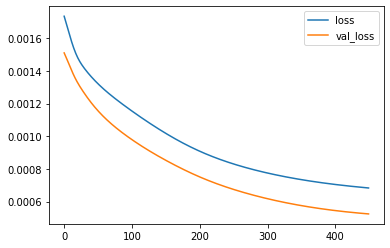

In [16]:
plt.plot(fit_hist.history['loss'][-450:], label='loss')
plt.plot(fit_hist.history['val_loss'][-450:], label='val_loss')
plt.legend()
plt.show()

In [17]:
pred = model.predict(X_test)

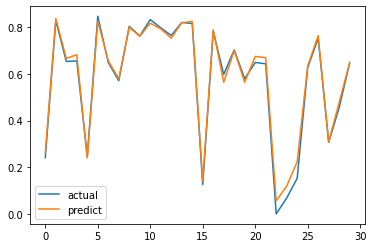

In [18]:
plt.plot(Y_test[:30], label='actual')
plt.plot(pred[:30], label='predict')
plt.legend()
plt.show()

In [20]:
last_data_30 = scaled_data[-30:].reshape(1,30,6)
today_close = model.predict(last_data_30)
print(today_close)

[[0.5533626]]


In [23]:
today_close_value = minmaxscaler.inverse_transform(
    [[0,0,0,today_close,0,0]])[0][3]
print(today_close_value)

69338.08648586273


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [26]:
today_actual = [[70000.0, 70300.0, 69800.0, 70200.0, 70200.0, 13686208]]
scaled_today_actual = minmaxscaler.transform(today_actual)[0]
print(scaled_today_actual)
#last_30에 붙여넣기

[0.57442348 0.50234742 0.58262712 0.57113402 0.61251401 0.1515534 ]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


In [27]:
last_data_29 = scaled_data[-29:]
last_30_data = np.append(last_data_29, scaled_today_actual)
last_30_data = last_30_data.reshape(1, 30, 6)
print(last_30_data.shape)

(1, 30, 6)


In [30]:
tomorrow_close = model.predict(last_30_data)
tomorrow_predicted_value = minmaxscaler.inverse_transform([[0,0,0,tomorrow_close,0,0]])
print(tomorrow_predicted_value[0][3])

69632.0429444313


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
